# CS61A, Spring 2025 Prof Denero 
## Composition Lecture
### Measuring Efficiency, Memoization, Exponentiation, Orders of Growth, Order of Growth Notation, Space
##### Sean Villegas

Videos:
- [Lectures](https://www.youtube.com/watch?v=DWhsOSHjY98&list=PL6BsET-8jgYU9eOK2Ft8hQuzIWb4h-Tim)


#### Measuring Efficiency

- the main point of this demo is to show us how efficient a program is in gpu and calculating a sequence with the fibonacci example. call_count is cumulative and shows us the amount of times it is called to get the result 

```python
def fib(n):
    """
    >>> fib = count(fib)
    >>> fib(5)
    5
    >>> fib.call_count
    15
    >>> fib(5)
    5
    >>> fib.call_count
    30
    """
 if n == 0:
    return 0
 elif n == 1:
    return 1
 else:
    return fib(n-2) + fib(n-1)
```


####  Memoization
- speeding up the running time of a program -> remember the results computed before

```python
def memo(f):
    """This function takes in a function, and stores the already computed values into the cache, thus allowing for other computation to happen and make the program more efficient """
    cache = {} # keys are arguments that map to return values

    def memoized(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return memoized # same behavior as f is a pure function

```

#### Exponentiation
- python has built in libraries to analyze the time it takes to compute a function.
- both will have spikes, but generally will look linear or logarithmic 

- Quadratic time: `The runtime increases rapidly — doubling the input size causes the work to grow roughly four times.`
    - An algorithm is said to have a quadratic time complexity when it needs to perform a `linear time` operation for **each value** in the input; e.g.:
    ```python
    for x in data:
        for y in data:
            print(x, y)
    ```

Constant time: `straight line`
- The most preferred option, doubling the input size will not increase the time 
    - An algorithm is said to have a `constant time` when it is not **dependent** on the input. No matter the size of the input, the running time **will always be the same**

Exponential time: `Curves up without bound`
- An algorithm is said to have an exponential time complexity when the growth **doubles** with each addition to the **input** data set. Think bruteforce strategy 


Linear time: `(straight growth)`
- doubling the input, doubles the time. 1024x the input takes, 1024x as much time
- An algorithm is `linear` if its execution time grows proportionally to the **input size**

Logarithmic time: `generally preferred and better (curved steady growth)`

From lecture: 

- doubling input increases the time by a constant C
- 1024x the input increases the time by only 10 times C

Notes:
- Logarithmic time complexity is highly efficient and desirable for large datasets or problems that can be divided into smaller sub-problems
- **Logarithmic time** almost always involves _shrinking_ the **input** by a `fraction` in each **step**.
- If a function _reduces_ its input by **half** or by a **constant fraction** each time, it's probably O(log n)

```python
# example of log time 
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
```

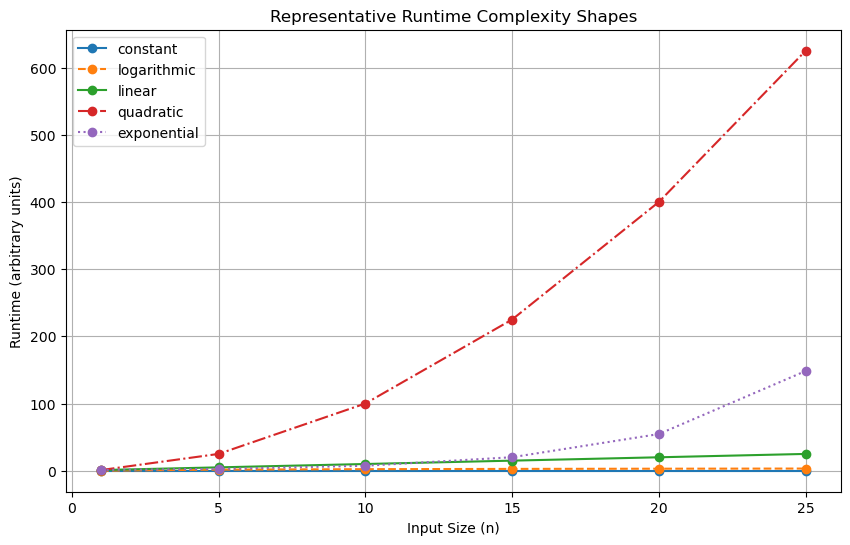

{'constant': [9.775161743164062e-06, 7.152557373046875e-07, 0.0, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07], 'logarithmic': [1.0013580322265625e-05, 1.9073486328125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06], 'linear': [1.0251998901367188e-05, 2.1457672119140625e-06, 1.1920928955078125e-06, 9.5367431640625e-07, 1.1920928955078125e-06, 1.9073486328125e-06], 'quadratic': [1.0013580322265625e-05, 3.0994415283203125e-06, 6.9141387939453125e-06, 1.3113021850585938e-05, 1.9788742065429688e-05, 2.9802322387695312e-05], 'exponential': [1.0013580322265625e-05, 3.600120544433594e-05, 0.0015900135040283203, 0.04373598098754883, 9.5367431640625e-07, 7.152557373046875e-07]}


In [5]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np

def measure_runtime(func, n):
    start_time = time.time()
    func(n)
    end_time = time.time()
    return end_time - start_time

def constant_time(n):
    return 42

def logarithmic_time(n):
    i = 1
    while i < n:
        i *= 2

def linear_time(n):
    for _ in range(n):
        pass

def quadratic_time(n):
    for i in range(n):
        for j in range(n):
            pass

def exponential_time(n):
    if n > 15:
        return  # Prevent excessive computation
    if n == 0:
        return 1
    return exponential_time(n-1) + exponential_time(n-1)

# Testing with small inputs
n_values = [1, 5, 10, 15, 20, 25]
functions = {
    'constant': constant_time,
    'logarithmic': logarithmic_time,
    'linear': linear_time,
    'quadratic': quadratic_time,
    'exponential': exponential_time,
}

results = {name: [measure_runtime(func, n) for n in n_values] for name, func in functions.items()}

# Plotting results with representative curve shapes
plt.figure(figsize=(10,6))
for name, runtimes in results.items():
    if name == 'logarithmic':
        plt.plot(n_values, np.log(n_values), marker='o', linestyle='--', label=name)
    elif name == 'linear':
        plt.plot(n_values, n_values, marker='o', linestyle='-', label=name)
    elif name == 'quadratic':
        plt.plot(n_values, np.array(n_values) ** 2, marker='o', linestyle='-.', label=name)
    elif name == 'exponential':
        plt.plot(n_values, np.exp(np.array(n_values) / 5), marker='o', linestyle=':', label=name)
    else:
        plt.plot(n_values, runtimes, marker='o', label=name)

plt.xlabel("Input Size (n)")
plt.ylabel("Runtime (arbitrary units)")
plt.title("Representative Runtime Complexity Shapes")
plt.legend()
plt.grid()
plt.show()

print(results)

#### Orders of Growth & Notation
_how time scales with input size_ 

- Quadratic time (parabola) (slow and common)
- Exponential growth. E.g., recursive fib (slow)
- Incrementing n multiplies time by a constant
- Linear growth. (slow exp) (very common)
- Logarithmic growth. (exp_fast) (great and scales to large inputs)
- Constant growth is the best, increasing the input size doesn't affect the time 
    - e.g. the dictionary key value lookup is constant 


##### Common Orders of Growth Notation

#### Big Theta (Θ) Notation
- **Exponential Growth**: Θ(bⁿ)
- **Quadratic Growth**: Θ(n²)
- **Linear Growth**: Θ(n)
- **Logarithmic Growth**: Θ(log n)
- **Constant Growth**: Θ(1)

#### Big O (O) Notation
- **Exponential Growth**: O(bⁿ)
- **Quadratic Growth**: O(n²)
- **Linear Growth**: O(n)
- **Logarithmic Growth**: O(log n)
- **Constant Growth**: O(1)

### Key Differences Between Θ and O Notation
- **Big O (O)** describes the upper bound (worst-case scenario) for the time it takes for a function to run.
- **Big Theta (Θ)** describes both the upper and lower bounds, meaning the function grows exactly at that rate.






#### Space 
- space is taken up by values and frames; you need to know how many are in the program when evaluated, and when you can let those frames go when evaluating certain parts of the program 

##### Understanding Space Consumption  
Programs consume **memory (space)** during execution, which includes:  
- **Values**: Longer lists take up more space than shorter ones.  
- **Frames**: Function calls create environment frames, which also consume memory.  

##### Active Environments  
At any moment, a set of **active environments** exist, consuming memory.  
- **Active environments** include any function call **currently being evaluated** (hasn’t returned yet).  
- Additionally, a **parent environment** of a function may remain active if the function is nested within another function.  

##### Memory Management in Python  
- Python **automatically reclaims memory** from frames and values that are no longer needed.  
- In Python Tutor, you can **visualize active frames** with the setting _"Don't display exited functions."_  

###### Example: Fibonacci and Frames  
Consider the recursive Fibonacci function and notice how the frames disappear once fib(6) is called and all frames are removed:  

```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fib(n - 1) + fib(n - 2)

```
Understanding with tree diagam:
fib(5) → fib(4) → fib(3) → fib(2) → fib(1)  (length = 5)

- Space complexity is affected by the number of active frames.
- Recursive functions with deep call stacks consume more space.
- Python manages memory automatically, but understanding space complexity helps optimize programs.

In [ ]:
## To measure max number of frames open at once, define count_frames
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fib(n - 1) + fib(n - 2)


def count_frames(f):
    open_count = 0
    max_count = 0

    def counted(n):
        nonlocal open_count, max_count
        open_count += 1
        max_count = max(max_count, open_count)

        result = f(n)

        open_count -= 1
        return result

    counted.open_count = lambda: open_count
    counted.max_count = lambda: max_count
    return counted

fib_counted = count_frames(fib)
fib_counted(20)
print(fib_counted.max_count())  # Output: 20

